<p style="align: center;"><img align=center src="https://s8.hostingkartinok.com/uploads/images/2018/08/308b49fcfbc619d629fe4604bceb67ac.jpg" width=500 height=450/></p>

<h3 style="text-align: center;"><b>"Глубокое обучение". Продвинутый поток</b></h3>

<h2 style="text-align: center;"><b>Семинар 5. Метрики в задаче классификации</b></h2>

Две основные задачи машинного обучения --- классификация и регрессия. C метрикой для задачи регрессии всё ясно: квадратичная функция потерь, $$f(y_{true}, y_{pred}) = (y_{true} - y_{pred})^2.$$

Метрик в задаче классификации можно придумать великое множество.

## Метрики, связанные с бинарными лейблами

Предположим, что мы решаем задачу кредитного скоринга (решаем, кому выдавать кредит, кому нет). Мы получили следующие ответы алгоритма: 
![alt text](https://drive.google.com/uc?id=1TvLmB3dHCAyuE6XHB33PGyjF0cfRHnrg)

Самое логичное решение для измерения качества --- посчитать процент совпадающих ответов. Такая метрика называется accuracy. В данном случае accuracy равна 60%. Плохо или хорошо?

"

"

"

"

"

"

"

"

"

"

"

"

"

"

"

Тут приходит к нам новый сотрудник и заявляет, что повысит accuracy на 10%. Он предъявляет такой результат на тесте:

![alt text](https://drive.google.com/uc?id=1jHgOXZ-XWtuuqSwG1L7CEK-goggBS3hB)

Accuracy повысилась! Но теперь банк выдаёт кредит всем заёмщикам. Вывод: для многих задач нужны другие метрики. Их разработкой мы и займёмся.

![alt text](https://drive.google.com/uc?id=1U8t8CVtBD-3PJJsi8oAQjrdTGEjZCnpu)

![alt text](https://drive.google.com/uc?id=1AfL-bqkd1lN66Fp1MJ70OxMMeVGwsn72)

![alt text](https://drive.google.com/uc?id=1pNhgPjEiirfwelo2GrkYU5UlQwr2xwgd)

### Precision
Пример для Precision: кредитный скоринг. Нам не выгодно выдавать кредит (y_pred = 1) неблагонадёжным заёмщикам (y_true = 0). За такие ошибки (ошибки первого рода) нас штрафует метрика.


### Recall
Пример для Recall: поиск скрытых военных баз противника. Опасна ситуация, когда опасный объект (y_true = 1) не был идентифицирован как военная база (y_pred = 0).

![alt text](https://drive.google.com/uc?id=1rqlgJdt62ZYQrqVYh4QJnHzW_5RgOnvS)

### F-мера
Комбинация precision и recall:

![alt text](https://drive.google.com/uc?id=1XR8VW8To2K_6QL0xz2V5xnjkGVcBYPvB)

## Метрики, связанные с вероятностными ответами

Мы уже сталкивались с алгоритмами, которые предсказывают не класс, а вероятность принадлежности к классу (например, линейная регрессия). Хотим ввести метрику, которая бы отражала качество такой "вероятностной классификации".

## ROC-кривая

<img src="https://i.ibb.co/mvF5F8K/Screenshot-from-2020-03-17-22-03-26.png" alt="Screenshot-from-2020-03-17-22-03-26" border="0" width=800>

## ROC-AUC

Метрика ROC-AUC определяется как площадь под ROC-кривой.

In [3]:
import numpy as np

In [15]:
y_true = [1,1,0,1,1,1,1,0,1,0,1,0,0,0,1,0,0,0]
y_pred = np.linspace(1, 0, len(y_true))

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
%matplotlib inline

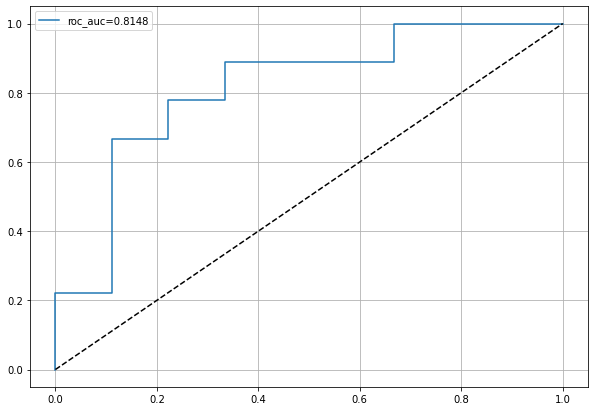

In [16]:
auc = roc_auc_score(y_true, y_pred)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_true, y_pred)[:-1], label=("roc_auc=%.4f") % auc)
plt.plot([0, 1], [0, 1], '--', color='black')

plt.grid()
plt.legend()
plt.show()

Порог для классификации определяется так, как вам нужно. Например, зная прибыль с надежного заемщика и убыток с ненадежного, можно определить порог выдачи кредита, максимизируя ожидаемую прибыль.